In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import glob
import os
import pickle
from googletrans import Translator
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from nltk.corpus import stopwords
from sklearn.svm import SVC
from nltk.stem import SnowballStemmer
import nltk
import unidecode
import re
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from nltk.stem import SnowballStemmer

#### Probes pre-processing. Lower, no accents and punctuaction, stemming on a sentence

In [2]:
stemmer = SnowballStemmer('spanish')
prueba = 'Detecció de plagi en documents mitjançant AI'
prueba = Translator().translate(prueba,dest='es')

cambio_1 = re.sub(r'[^\w\s]','', unidecode.unidecode(prueba.text.lower()))

word_tokens = nltk.word_tokenize(cambio_1)

listado_1 = []


filtered_sentence = [w for w in word_tokens if not w in stopwords.words('spanish')]
listado_1.append(" ".join(filtered_sentence))

stemmer = SnowballStemmer('spanish')

listado_2 = []

for word in listado_1:
    listado_2.append(" ".join([stemmer.stem(word) for word in nltk.word_tokenize(word)]))
    

In [18]:
listado_2

['deteccion plagi document mediant ai']

#### Plotting how many docs are of every topic

In [3]:
pwd_list_automobil = (glob.glob("../00Data/dataset_pdf/Automobil/*.pdf")) #S'utilitza carpeta de proba
documents_automobil = []
for element in pwd_list_automobil:
    documents_automobil.append(element)
    
pwd_list_biomedicina = (glob.glob("../00Data/dataset_pdf/Biomedicina/*.pdf")) #S'utilitza carpeta de proba
documents_biomedicina = []
for element in pwd_list_biomedicina:
    documents_biomedicina.append(element)
    
pwd_list_electronica = (glob.glob("../00Data/dataset_pdf/Electronica/*.pdf")) #S'utilitza carpeta de proba
documents_electronica = []
for element in pwd_list_electronica:
    documents_electronica.append(element)
        
pwd_list_fluids = (glob.glob("../00Data/dataset_pdf/Mecanica_fluids/*.pdf")) #S'utilitza carpeta de proba
documents_fluids = []
for element in pwd_list_fluids:
    documents_fluids.append(element)

In [4]:
df1 = pd.DataFrame({'Label':'Automobil','Doc_name': documents_automobil})
df2 = pd.DataFrame({'Label':'Biomedicina','Doc_name': documents_biomedicina})
df4 = pd.DataFrame({'Label':'Electronica','Doc_name': documents_electronica})
df5 = pd.DataFrame({'Label':'Mecanica_fluids','Doc_name': documents_fluids})

df = pd.concat([df1,df2,df4,df5])
df.head(10)

,Label,Doc_name
0,Automobil,../00Data/dataset_pdf/Automobil/Diseno_de_un_v...
1,Automobil,../00Data/dataset_pdf/Automobil/Diseno_de_un_b...
2,Automobil,../00Data/dataset_pdf/Automobil/Mecanisme_elev...
3,Automobil,../00Data/dataset_pdf/Automobil/Diseno_de_una_...
4,Automobil,../00Data/dataset_pdf/Automobil/Analisis_y_dis...
5,Automobil,../00Data/dataset_pdf/Automobil/Laboratorio_de...
6,Automobil,../00Data/dataset_pdf/Automobil/Diseno_de_una_...
7,Automobil,../00Data/dataset_pdf/Automobil/Capo_activo.pdf
8,Automobil,../00Data/dataset_pdf/Automobil/Diseno_de_los_...
9,Automobil,../00Data/dataset_pdf/Automobil/Diseno_e_imple...


In [5]:
df.shape

(79, 2)

In [4]:
num_auto = sum(df['Label'] == 'Automobil')
num_bio = sum(df['Label'] == 'Biomedicina')
num_electr = sum(df['Label'] == 'Electronica')
num_fluid = sum(df['Label'] == 'Mecanica_fluids')

In [5]:
num_auto

19

Text(0.5,1,'Quantitat documents segons la seva categoria')

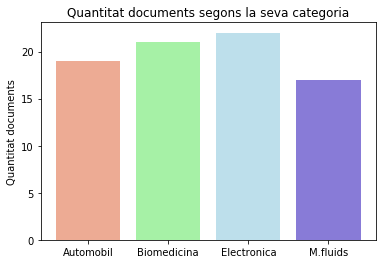

In [6]:
objects = ['Automobil','Biomedicina','Electronica','M.fluids']
y_pos = np.arange(len(objects))
performance = [num_auto,num_bio,num_electr,num_fluid]
my_colors = ['darksalmon','lightgreen','lightblue','slateblue']

plt.bar(y_pos, performance, align='center', alpha=0.8,color=my_colors)
plt.Figure
plt.xticks(y_pos, objects)
plt.ylabel('Quantitat documents')
plt.xlabel('')
plt.title('Quantitat documents segons la seva categoria')

# INFORMACIÓ DE PARAULES/FRASES EN EL DATASET

Si esta configurat nltk.sent_tokenize --> es llisten frases
si està configurat nltk.tokenize --> es llisten paraules

In [14]:
import nltk

### fluids

In [20]:
llista_text_documents_mecanica_fluids = []
for file in glob.glob('../00Data/dataset_txt/Mecanica_fluids/*'):
    with open(file,'r') as txt:
        llista_text_documents_mecanica_fluids.append(txt.read())
        
no_paragrafs_fluids = []
for document in llista_text_documents_mecanica_fluids:
    no_paragrafs_fluids.append(document.replace('\n',' '))       
    
fluids_tokenized = []
for document in no_paragrafs_fluids:
    fluids_tokenized.append(nltk.word_tokenize(document))

number_of_words_for_each_document_fluids = []
for document in fluids_tokenized:
    number_of_words_for_each_document_fluids.append(len(document))

### automobil

In [21]:
llista_text_documents_mecanica_fluids = []
for file in glob.glob('../00Data/dataset_txt/Automobil//*'):
    with open(file,'r') as txt:
        llista_text_documents_mecanica_fluids.append(txt.read())
        
no_paragrafs_fluids = []
for document in llista_text_documents_mecanica_fluids:
    no_paragrafs_fluids.append(document.replace('\n',' '))       
    
fluids_tokenized = []
for document in no_paragrafs_fluids:
    fluids_tokenized.append(nltk.word_tokenize(document))

number_of_words_for_each_document_automobil = []
for document in fluids_tokenized:
    number_of_words_for_each_document_automobil.append(len(document))

### electronica

In [22]:
llista_text_documents_mecanica_fluids = []
for file in glob.glob('../00Data/dataset_txt/Electronica/*'):
    with open(file,'r') as txt:
        llista_text_documents_mecanica_fluids.append(txt.read())
        
no_paragrafs_fluids = []
for document in llista_text_documents_mecanica_fluids:
    no_paragrafs_fluids.append(document.replace('\n',' '))       
    
fluids_tokenized = []
for document in no_paragrafs_fluids:
    fluids_tokenized.append(nltk.word_tokenize(document))

number_of_words_for_each_document_electronica = []
for document in fluids_tokenized:
    number_of_words_for_each_document_electronica.append(len(document))

### biomedicina

In [23]:
llista_text_documents_mecanica_fluids = []
for file in glob.glob('../00Data/dataset_txt/Biomedicina/*'):
    with open(file,'r') as txt:
        llista_text_documents_mecanica_fluids.append(txt.read())
        
no_paragrafs_fluids = []
for document in llista_text_documents_mecanica_fluids:
    no_paragrafs_fluids.append(document.replace('\n',' '))       
    
fluids_tokenized = []
for document in no_paragrafs_fluids:
    fluids_tokenized.append(nltk.word_tokenize(document))

number_of_words_for_each_document_bio = []
for document in fluids_tokenized:
    number_of_words_for_each_document_bio.append(len(document))

In [24]:
sum(number_of_words_for_each_document_bio)+ sum(number_of_words_for_each_document_automobil) + sum(number_of_words_for_each_document_electronica)+sum(number_of_words_for_each_document_fluids)

1408062

# Informació sobre els documents plagiats creats

### Mecànica de fluids

He creat dos documents plagiats.

1r document (Tipografic): Té 430 paraules, de les quals s'han plagiat 221. El % total de plagi es d'un 51,39 (real)
És interessant saber el % total de plagi després d'aplicar el pre-processing: 54,79%
Ha estat plagiat del document "Estudio fluido dinámico de un agitador de turbina".
El plagi s'ha fet seguint la metodologia copy paste d'algun paràgraf

2n document (Manuscrit): Format per 219 paraules en total, de les quals 120 han estat plagiades
El % de plagi real es de: 46,53%
Ha estat plagiat del document "Simulación del comportamiento de una bomba hidráulica".
El plagi s'ha fet seguint la metodologia copy paste d'algun paràgraf



    

In [13]:
text_primer_document_fluids = []
with open(glob.glob('../00Data/dataset_documentos_generados/Turbinas dinámicas y golpe de ariete.txt')[0],'r') as txt:
    text_primer_document_fluids.append(txt.read())
    
primer_document_split_paragraph= text_primer_document_fluids[0].split('\n')

while("" in primer_document_split_paragraph) : 
    primer_document_split_paragraph.remove("") 
    
for paragraph in primer_document_split_paragraph:
    print(len(nltk.word_tokenize(paragraph)))

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/Users/rogerlopezsantalo/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-13-c8356ed1bf13>", line 2, in <module>
    with open(glob.glob('../00Data/dataset_documentos_generados/Turbinas dinámicas y golpe de ariete.txt')[0],'r') as txt:
IndexError: list index out of range

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/rogerlopezsantalo/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 1863, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'IndexError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/rogerlopezsantalo/anaconda3/lib/python3.6/site-packages/IPython/core/ultratb.py", line 109

IndexError: list index out of range

In [ ]:
stemmer = SnowballStemmer('spanish')

In [ ]:
#Funció que permet pre-processar el text dins de qualsevol tfg
def clean_raw_text (documento):
    for document in documento:

        text = str(documento).replace('\n',' ')
        text = text.lower()
        word_tokens = nltk.word_tokenize(text)
        filtered_text = " ".join([w for w in word_tokens if not w in stopwords.words('spanish')])
        stemmed_text = " ".join(stemmer.stem(word) for word in nltk.word_tokenize(filtered_text))
        no_punctuaction_text = re.sub(r'[^\w\s]','',stemmed_text)
        no_accents = unidecode.unidecode(no_punctuaction_text)
        no_digits_text = re.sub('\d', '', no_accents)
        clean1 = re.sub(' +', ' ',no_digits_text)
        full_clean = clean1.strip()   
    return(full_clean)
                
        
        



In [ ]:
clean_raw_text(text_primer_document_fluids)

## Number of pages

In [2]:
!pip install pyPdf

  Created wheel for pyPdf: filename=pyPdf-1.13-py3-none-any.whl size=36499 sha256=302bd50e12cd09fdb10b622d165214208d82b94f1e89181468244ceedce79c40
  Stored in directory: /Users/rogerlopezsantalo/Library/Caches/pip/wheels/59/0b/81/100d5f5e0c3952d9fa354a293b14fef5d27f785461c5fbbf99
Successfully built pyPdf
You should consider upgrading via the '/Users/rogerlopezsantalo/anaconda3/bin/python -m pip install --upgrade pip' command.


In [7]:
from PyPDF2 import PdfFileReader
import glob

In [10]:
num_pages = []
for file in glob.glob('../00Data/dataset_pdf/Automobil/*'):
    pdf = PdfFileReader(open(str(file),'rb'))
    num_pages.append(pdf.getNumPages())

for file in glob.glob('../00Data/dataset_pdf/Biomedicina/*'):
    pdf = PdfFileReader(open(str(file),'rb'))
    num_pages.append(pdf.getNumPages())

for file in glob.glob('../00Data/dataset_pdf/Electronica/*'):
    pdf = PdfFileReader(open(str(file),'rb'))
    num_pages.append(pdf.getNumPages())
    
for file in glob.glob('../00Data/dataset_pdf/Mecanica_fluids/*'):
    pdf = PdfFileReader(open(str(file),'rb'))
    num_pages.append(pdf.getNumPages())



In [13]:
sum(num_pages)

8398